In [ ]:
import requests
def query():
    response = requests.get("https://api.covidactnow.org/v2/county/CA.json?apiKey=58a4b8f2e990466c9afb985f6d757f79")
    covid_data = response.json()
    return covid_data
query()

[{'actuals': {'cases': 185120,
   'contactTracers': None,
   'deaths': 1588,
   'hospitalBeds': {'capacity': 2614,
    'currentUsageCovid': 181,
    'currentUsageTotal': 1623},
   'icuBeds': {'capacity': 241,
    'currentUsageCovid': 30,
    'currentUsageTotal': 154},
   'negativeTests': None,
   'newCases': 4767,
   'newDeaths': 2,
   'positiveTests': None,
   'vaccinationsCompleted': 1308483,
   'vaccinationsInitiated': 1413868,
   'vaccinationsInitiatedDemographics': {'age': {'0-17': 49865,
     '12-17': 103692,
     '18-49': 696278,
     '5-11': 77399,
     '50-64': 294740,
     '65_plus': 241535},
    'ethnicity': None,
    'race': {'ai_an': 4120,
     'asian': 465448,
     'black': 111797,
     'latino': 257496,
     'multiple': 38843,
     'other': 91591,
     'pacific_islander': 10147,
     'unknown': 41526,
     'white': 392900},
    'sex': None},
   'vaccinesAdministered': 3281599,
   'vaccinesAdministeredDemographics': None,
   'vaccinesDistributed': None},
  'annotations': 

In [ ]:
covid_data = query()
countyList = (list(
    filter(lambda statistics: statistics['county'] == 'Placer County', covid_data)))
print(countyList)

[{'fips': '06061', 'country': 'US', 'state': 'CA', 'county': 'Placer County', 'level': 'county', 'lat': None, 'locationId': 'iso1:us#iso2:us-ca#fips:06061', 'long': None, 'population': 398329, 'metrics': {'testPositivityRatio': 0.192, 'testPositivityRatioDetails': {'source': 'other'}, 'caseDensity': 184.7, 'contactTracerCapacityRatio': None, 'infectionRate': 1.57, 'infectionRateCI90': 0.1, 'icuCapacityRatio': 0.82, 'vaccinationsInitiatedRatio': 0.693, 'vaccinationsCompletedRatio': 0.641}, 'riskLevels': {'overall': 5, 'testPositivityRatio': 2, 'caseDensity': 5, 'contactTracerCapacityRatio': 4, 'infectionRate': 3, 'icuCapacityRatio': 2}, 'cdcTransmissionLevel': 3, 'actuals': {'cases': 52773, 'deaths': 504, 'positiveTests': None, 'negativeTests': None, 'contactTracers': None, 'hospitalBeds': {'capacity': 810, 'currentUsageTotal': 766, 'currentUsageCovid': 134}, 'icuBeds': {'capacity': 99, 'currentUsageTotal': 81, 'currentUsageCovid': 23}, 'newCases': 776, 'newDeaths': 3, 'vaccinesDistribu

In [ ]:
 # Arpitha's Code
 countyInfo = {}
for i in countyList:
    for j,k in i.items():
        if j == 'county' or j == 'population' or j == 'riskLevels' or j == 'metrics' or j == 'cdcTransmissionLevel':
            countyInfo[j] = k
print(countyInfo)

{'county': 'Placer County', 'population': 398329, 'metrics': {'testPositivityRatio': 0.192, 'testPositivityRatioDetails': {'source': 'other'}, 'caseDensity': 184.7, 'contactTracerCapacityRatio': None, 'infectionRate': 1.57, 'infectionRateCI90': 0.1, 'icuCapacityRatio': 0.82, 'vaccinationsInitiatedRatio': 0.693, 'vaccinationsCompletedRatio': 0.641}, 'riskLevels': {'overall': 5, 'testPositivityRatio': 2, 'caseDensity': 5, 'contactTracerCapacityRatio': 4, 'infectionRate': 3, 'icuCapacityRatio': 2}, 'cdcTransmissionLevel': 3}


In [ ]:
test_positivity_threshold = 0.05
case_density_threshold = 25
infection_rate_threshold = 1
overall_threshold = 1

In [ ]:
for a,b in countyInfo.items():
  if a == 'metrics':
    for c,d in b.items():
      if c == 'testPositivityRatio':
        if d >= test_positivity_threshold:
          test_positivity = False
          test_positivity_num = d
          print('TEST POSITIVITY TEST: FAILED')
        else:
          test_positivity = True
          test_positivity_num = d
          print('TEST POSITIVITY TEST: PASSED')
      if c == 'caseDensity':
        if  d >= case_density_threshold:
          case_density = False
          case_density_num = d
          print('CASE DENSITY TEST: FAILED')
        else:
          case_density = True
          case_density_num = d
          print('CASE DENSITY TEST: PASSED')
      if c == 'infectionRate':
        if d >= infection_rate_threshold :
          infection_rate = False
          infection_rate_num = d
          print('INFECTION RATE TEST: FAILED')
        else:
          infection_rate = True
          infection_rate_num = d
          print('INFECTION RATE TEST: PASSED')
  if a == 'riskLevels':
    for t,u in b.items():
      if t == 'overall':
        if u > overall_threshold:
          overall = False
          overall_num = u
          print('OVERALL TEST: FAILED')
        else:
          overall = True
          overall_num = u
          print('OVERALL TEST: TRUE')

TEST POSITIVITY TEST: FAILED
CASE DENSITY TEST: FAILED
INFECTION RATE TEST: FAILED
OVERALL TEST: FAILED


In [ ]:
if test_positivity == False or case_density == False or infection_rate == False or overall == False:
  print('Based on your county infection data, gatherings are not reccomended.')
else:
  print('Covid exposure in your region appears to not be so high. When you meet for your event, please ensure you follow cdc guidelines.')
  print('https://www.cdc.gov/coronavirus/2019-ncov/index.html')

Based on your county infection data, gatherings are not reccomended.


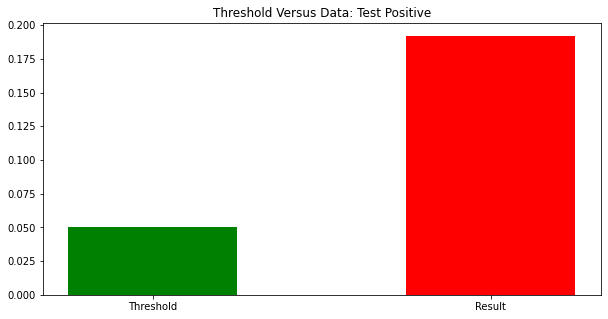

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
plt.bar('Threshold', test_positivity_threshold, color ='green',
        width = 0.5)
plt.bar('Result', test_positivity_num, color ='red',
        width = 0.5)
plt.title("Threshold Versus Data: Test Positive")
plt.show()

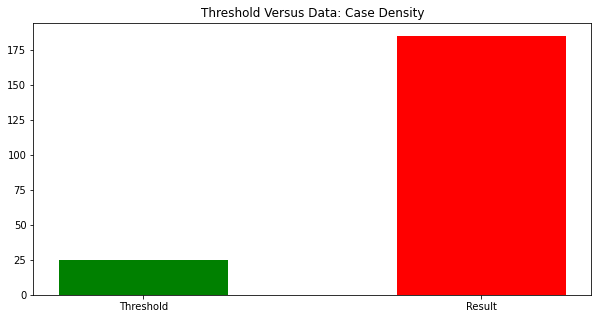

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
plt.bar('Threshold', case_density_threshold, color ='green',
        width = 0.5)
plt.bar('Result', case_density_num, color ='red',
        width = 0.5)
plt.title("Threshold Versus Data: Case Density")
plt.show()

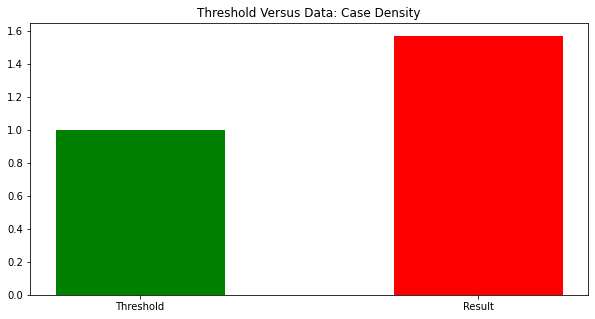

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
plt.bar('Threshold', infection_rate_threshold, color ='green',
        width = 0.5)
plt.bar('Result', infection_rate_num, color ='red',
        width = 0.5)
plt.title("Threshold Versus Data: Case Density")
plt.show()

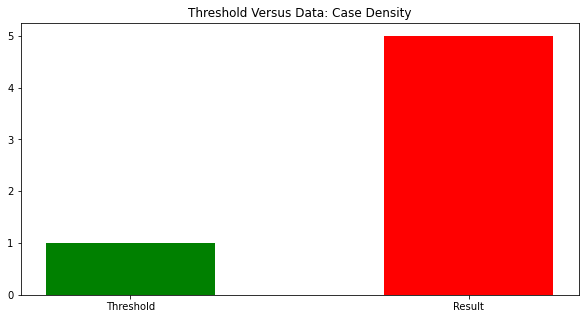

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
plt.bar('Threshold', overall_threshold, color ='green',
        width = 0.5)
plt.bar('Result', overall_num, color ='red',
        width = 0.5)
plt.title("Threshold Versus Data: Case Density")
plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# fig = plt.figure(figsize = (10, 5))
# Threshold = [test_positivity_threshold, case_density_threshold, infection_rate_threshold, overall_threshold]
# Result = [test_positivity_num, case_density_num, infection_rate_num, overall_num]
# plt.bar(Threshold, Threshold, color ='green',
#         width = 0.5)
# # plt.bar('Result', Result, color ='blue',
# #         width = 0.5)
# plt.title("Threshold Versus Data: Test Positive")
# plt.show()

In [ ]:
#UPDATED API HANDLER
import requests
import json

class ApiHandler():
    def __init__(self, county, state):
        self.county = county
        self.state = state
        self.query()

    def query(self):
        # request
        response = requests.get(
            "https://api.covidactnow.org/v2/county/CA.json?apiKey=58a4b8f2e990466c9afb985f6d757f79")
        covid_data = response.json()
        host_county = (list(
            filter(lambda item: item['county'] == self.county, covid_data)))
        county_info = {}
        for i in host_county:
            for j, k in i.items():
                if j == 'county' or j == 'population' or j == 'riskLevels' or j == 'metrics' or j == 'cdcTransmissionLevel':
                    county_info[j] = k
        return county_info

        #EXAMPLE USE
        A = ApiHandler("Santa Clara County", "CA")

        countyInfo = A.query()
        print(countyInfo)

In [ ]:
# Download the helper library from https://www.twilio.com/docs/python/install
from twilio.rest import Client

# Find your Account SID and Auth Token at twilio.com/console
# and set the environment variables. See http://twil.io/secure
account_sid = 'ACddccb2713c501a3f1ec529366a252550'
auth_token = '8f58d72dfb3d4a23d48c447202358bb4'

client = Client(account_sid, auth_token)

message = client.messages \
                .create(
                    body="Thank you for....",
                    from_='+19592101715',
                    to='+14088722403'
                )

print(message.sid)

ModuleNotFoundError: ignored

# New Section